In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

In [3]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.4377,  1.0000],
        [-0.4928,  1.0000],
        [-0.1703,  1.0000],
        [ 0.0378,  1.0000],
        [ 0.2368,  1.0000]])

In [4]:
a = tensor(3.,2); a

tensor([3., 2.])

In [5]:
y = x@a + 0.25*torch.randn(n)

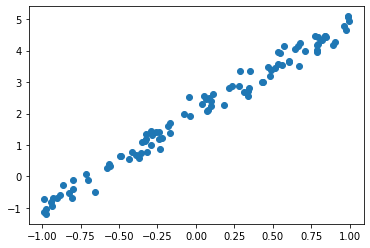

In [6]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [7]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [8]:
a = tensor(-1.0 ,1.0)
#int라면 this will spit the dummy. -1.,1로는 가능(float와 같은의미) 

In [9]:
y_hat = x@a
mse(y_hat, y)

tensor(6.9887)

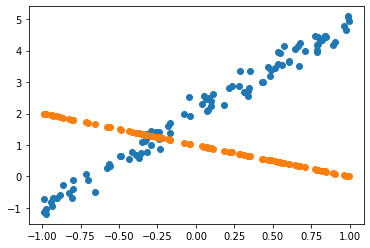

In [10]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [11]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [12]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [13]:
lr = 1e-1
for t in range(100): update()

tensor(6.9887, grad_fn=<MeanBackward0>)
tensor(1.2768, grad_fn=<MeanBackward0>)
tensor(0.3288, grad_fn=<MeanBackward0>)
tensor(0.1170, grad_fn=<MeanBackward0>)
tensor(0.0688, grad_fn=<MeanBackward0>)
tensor(0.0578, grad_fn=<MeanBackward0>)
tensor(0.0553, grad_fn=<MeanBackward0>)
tensor(0.0548, grad_fn=<MeanBackward0>)
tensor(0.0546, grad_fn=<MeanBackward0>)
tensor(0.0546, grad_fn=<MeanBackward0>)


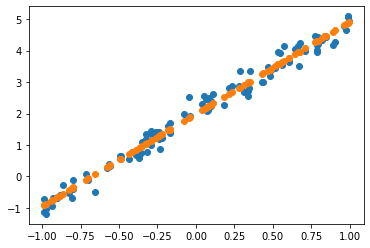

In [14]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach());

## Animate it!

In [15]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [16]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate : multiply our gradient by, to decide how much to update the weights by. 
- Epoch : one complete run through all of our data points(images). 많이 할 수록 overfitting 위험성있음.
- Minibatch : mini-batch를 설정하면 1 epochs에 iteration횟수가 달라짐. 
- SGD
- Model / Architecture : same things..., architecture is the mathematical function that you're fitting the parameters to.
- Parameters : coefficients = weights라고도 불림. the numbers that you are updating.
- Loss function : tells how far away or how close you are to the correct answer.

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.